In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
df.shape

(29531, 16)

In [5]:
df.size

472496

In [6]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [7]:
df.info

<bound method DataFrame.info of                 City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Be

In [8]:
df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [9]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


# Handeling Null Values

In [10]:
df.isnull().sum()/df.shape[0]*100

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64

In [11]:
# removing attribute xylene from the dataset due to the fact that the column values were empty 
df.drop(['Xylene'], axis=1, inplace=True)

In [12]:
# imputing numerical columns with median
numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

/var/folders/w7/sjycmbc948n0dz_kl8203fpr0000gn/T/ipykernel_3148/439171919.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [13]:
df.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,NaN
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,NaN
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,NaN
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,NaN
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,NaN
5,Ahmedabad,2015-01-06,48.57,95.68,45.41,38.48,81.50,15.85,45.41,45.76,46.51,5.42,10.83,118.0,NaN
6,Ahmedabad,2015-01-07,48.57,95.68,112.16,40.62,130.77,15.85,112.16,32.28,33.47,0.00,0.00,118.0,NaN
7,Ahmedabad,2015-01-08,48.57,95.68,80.87,36.74,96.75,15.85,80.87,38.54,31.89,0.00,0.00,118.0,NaN
8,Ahmedabad,2015-01-09,48.57,95.68,29.16,31.00,48.00,15.85,29.16,58.68,25.75,0.00,0.00,118.0,NaN
9,Ahmedabad,2015-01-10,48.57,95.68,9.89,7.04,0.00,15.85,0.89,8.29,4.55,0.00,0.00,118.0,NaN


# mapping AQI bucket to AQI values

In [14]:
def get_aqi_bucket(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Satisfactory'
    elif aqi <= 200: return 'Moderate'
    elif aqi <= 300: return 'Poor'
    elif aqi <= 400: return 'Very Poor'
    else: return 'Severe'

df['AQI_Bucket'] = df['AQI'].apply(get_aqi_bucket)

In [15]:
# verifying no null values are left
df.isnull().sum()/df.shape[0]*100

City          0.0
Date          0.0
PM2.5         0.0
PM10          0.0
NO            0.0
NO2           0.0
NOx           0.0
NH3           0.0
CO            0.0
SO2           0.0
O3            0.0
Benzene       0.0
Toluene       0.0
AQI           0.0
AQI_Bucket    0.0
dtype: float64

# Checking if data types are correct

In [16]:
df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
AQI           float64
AQI_Bucket     object
dtype: object

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df.dtypes

City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
AQI                  float64
AQI_Bucket            object
dtype: object

# Data Visulaization

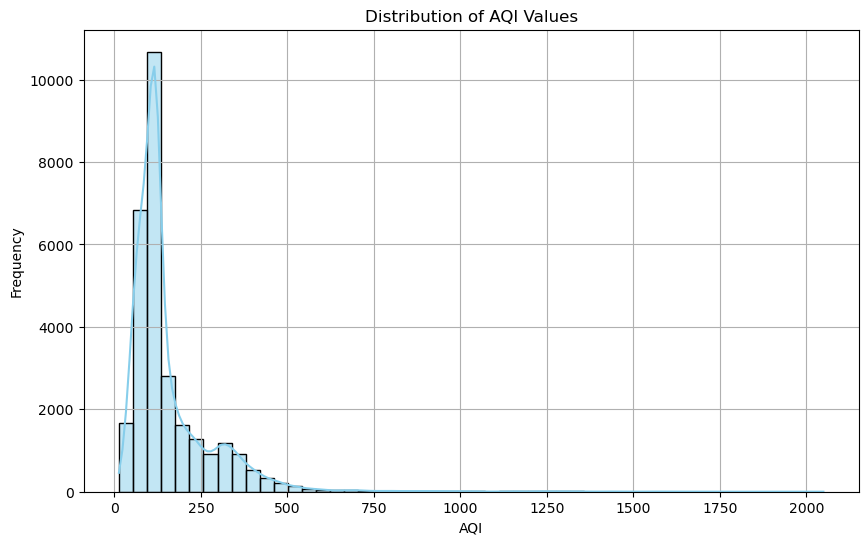

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['AQI'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of AQI Values')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/var/folders/w7/sjycmbc948n0dz_kl8203fpr0000gn/T/ipykernel_3148/3533940603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AQI_Bucket', order=df['AQI_Bucket'].value_counts().index, palette='Set2')


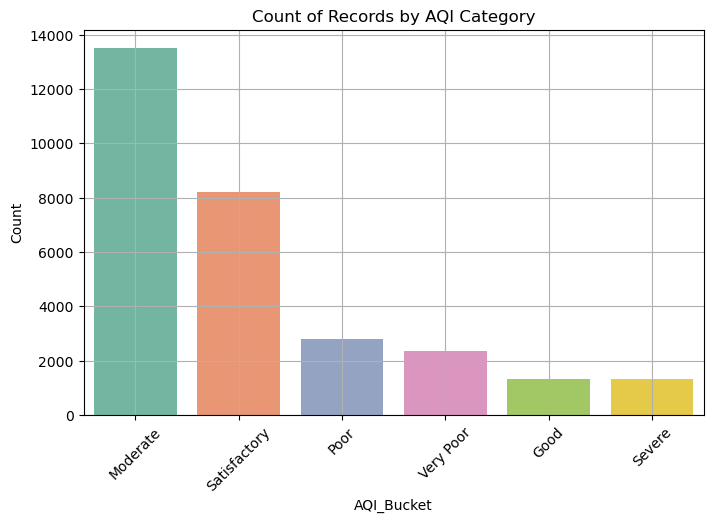

In [20]:
# AQI Bucket Count
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='AQI_Bucket', order=df['AQI_Bucket'].value_counts().index, palette='Set2')
plt.title('Count of Records by AQI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/var/folders/w7/sjycmbc948n0dz_kl8203fpr0000gn/T/ipykernel_3148/831550359.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_aqi_by_city.index, y=avg_aqi_by_city.values, palette='magma')


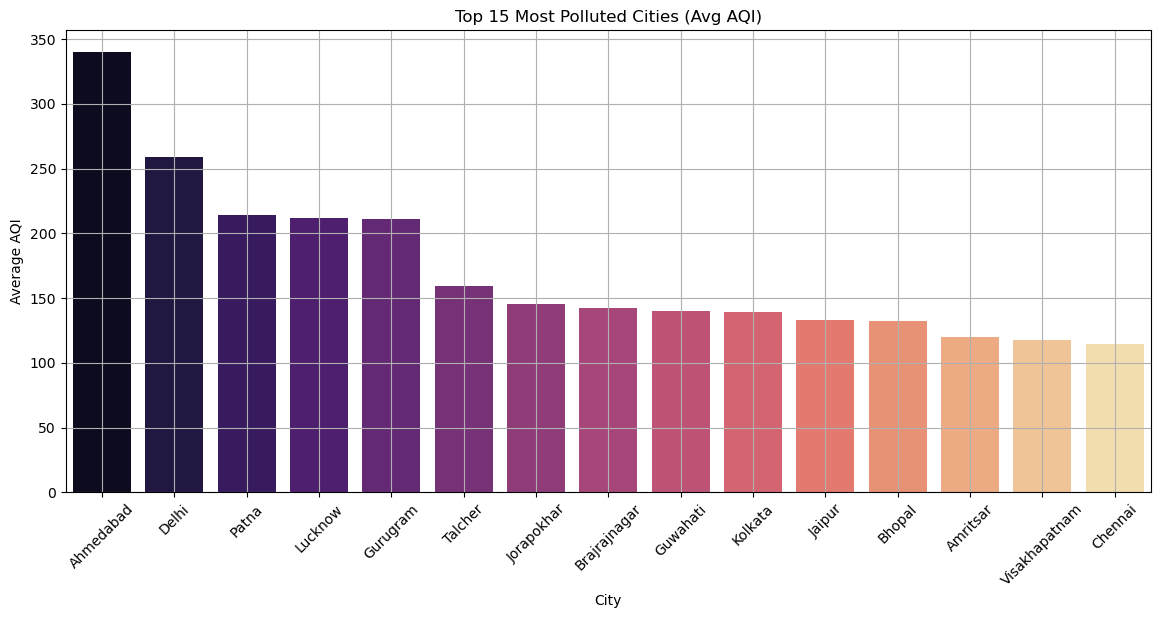

In [21]:
# Average AQI by City
plt.figure(figsize=(14,6))
avg_aqi_by_city = df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=avg_aqi_by_city.index, y=avg_aqi_by_city.values, palette='magma')
plt.title('Top 15 Most Polluted Cities (Avg AQI)')
plt.xticks(rotation=45)
plt.ylabel('Average AQI')
plt.grid(True)
plt.show()

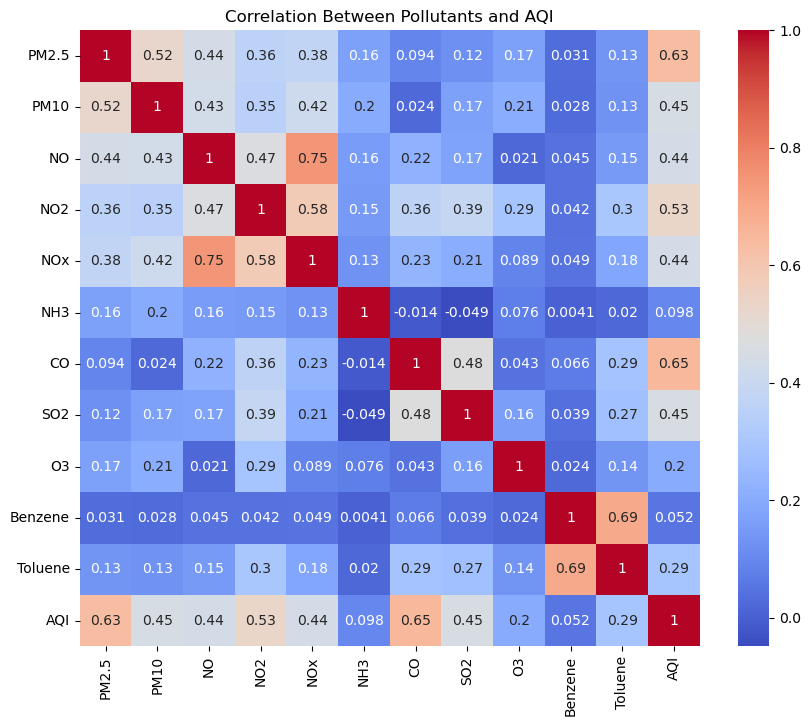

In [22]:
# Polutant vs AQI Correlation Heatmap
plt.figure(figsize=(10,8))
corr = df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','AQI']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Pollutants and AQI")
plt.show()

/var/folders/w7/sjycmbc948n0dz_kl8203fpr0000gn/T/ipykernel_3148/3184661143.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Month', y='AQI', estimator='mean', ci=None, color='orange')


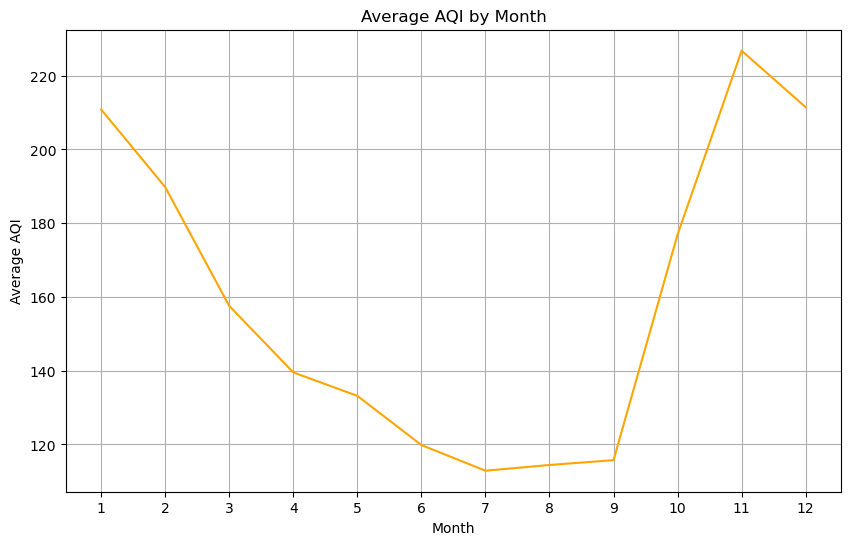

In [23]:
# Monthly AQI Trend
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is datetime
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Month', y='AQI', estimator='mean', ci=None, color='orange')
plt.title('Average AQI by Month')
plt.xticks(range(1,13))
plt.ylabel('Average AQI')
plt.grid(True)
plt.show()

/var/folders/w7/sjycmbc948n0dz_kl8203fpr0000gn/T/ipykernel_3148/4254403399.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['City'].isin(top_cities)], x='City', y='AQI', palette='coolwarm')


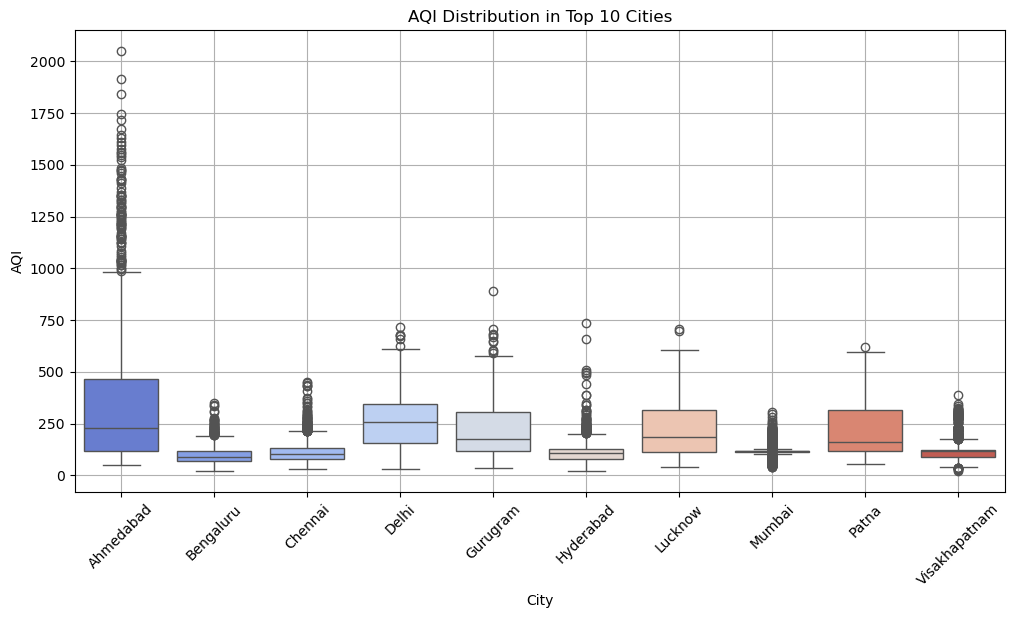

In [24]:
# Pollution campariosion by City
top_cities = df['City'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['City'].isin(top_cities)], x='City', y='AQI', palette='coolwarm')
plt.title('AQI Distribution in Top 10 Cities')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

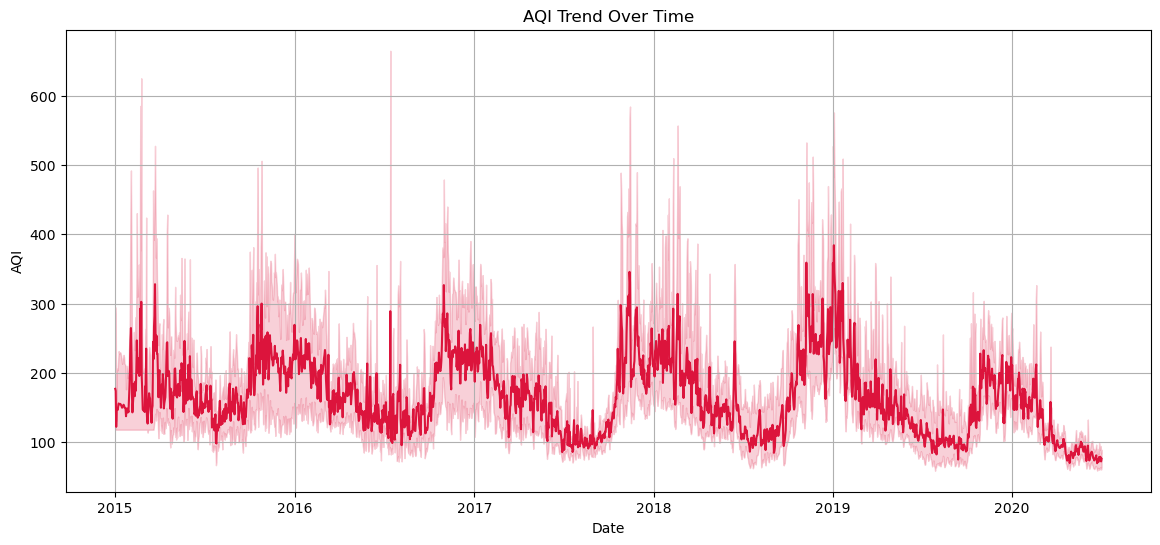

In [25]:
# AQI trend over Time

# Sort by date
df = df.sort_values('Date')

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='Date', y='AQI', color='crimson')
plt.title('AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

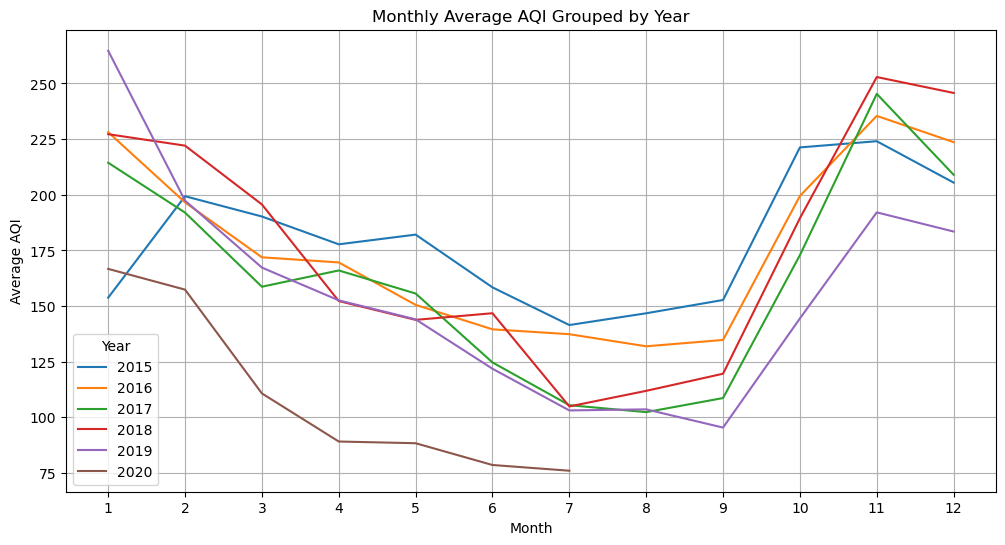

In [26]:
# Monthly Average AQI
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

monthly_avg = df.groupby(['Year', 'Month'])['AQI'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_avg, x='Month', y='AQI', hue='Year', palette='tab10')
plt.title('Monthly Average AQI Grouped by Year')
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.grid(True)
plt.show()

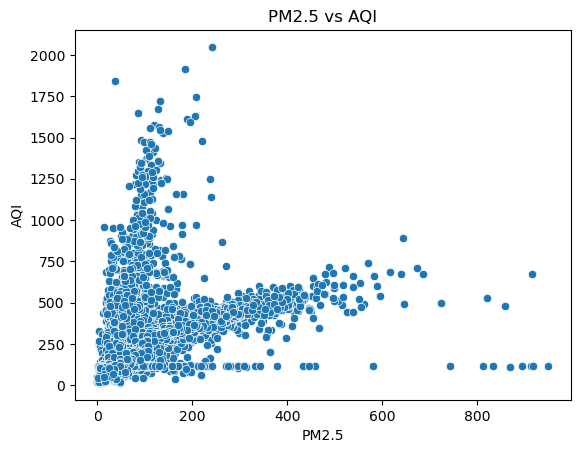

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='PM2.5', y='AQI')
plt.title("PM2.5 vs AQI")
plt.show()

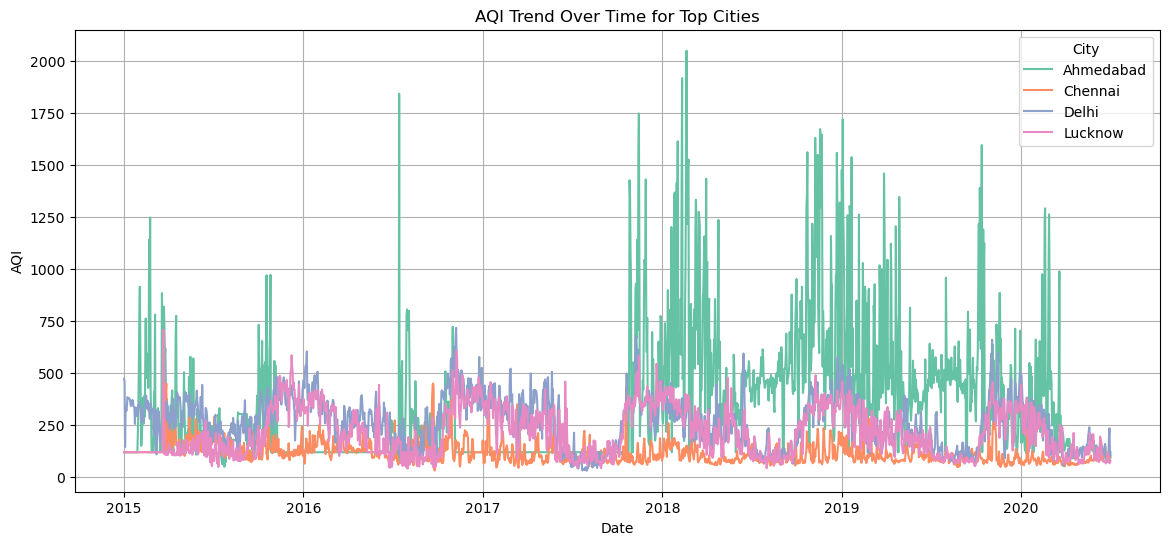

In [28]:
# city wise AQI trend over time
top_cities = df['City'].value_counts().head(4).index
df_top_cities = df[df['City'].isin(top_cities)]

plt.figure(figsize=(14,6))
sns.lineplot(data=df_top_cities, x='Date', y='AQI', hue='City', palette='Set2')
plt.title('AQI Trend Over Time for Top Cities')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

# Splitting the Data

In [29]:
data = df.copy()

In [30]:
data = data.drop(['Date'], axis=1)

In [31]:
X = data.drop(['AQI_Bucket'], axis=1)
y = data['AQI_Bucket']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Outlier treatment in training data

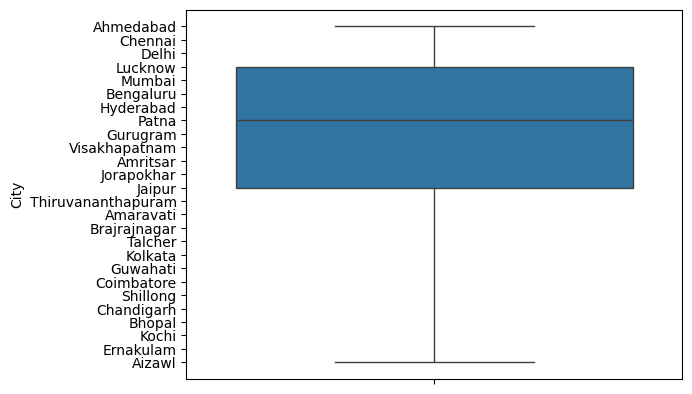

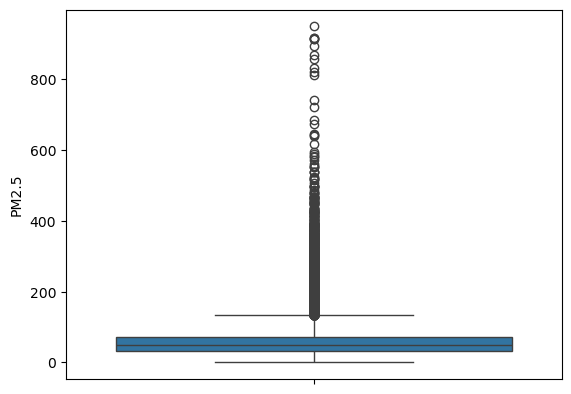

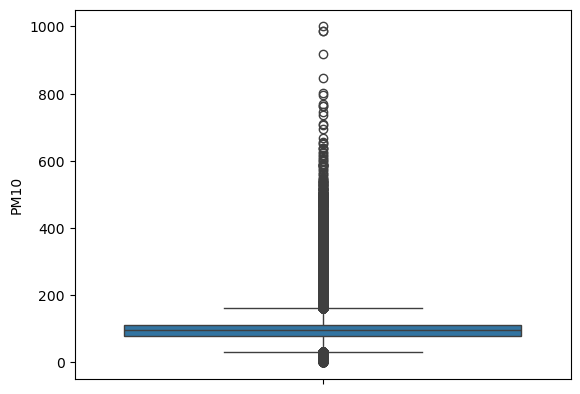

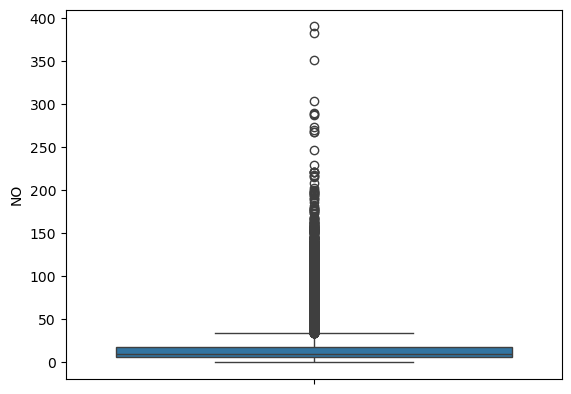

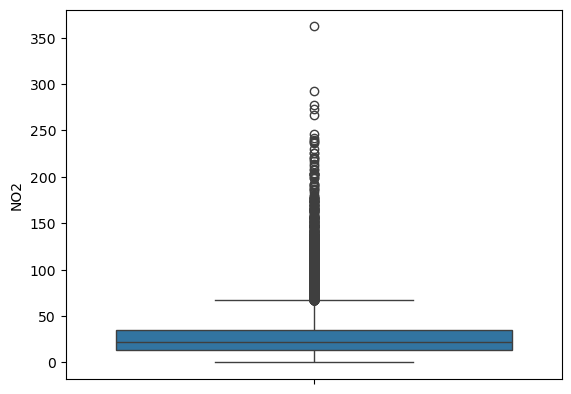

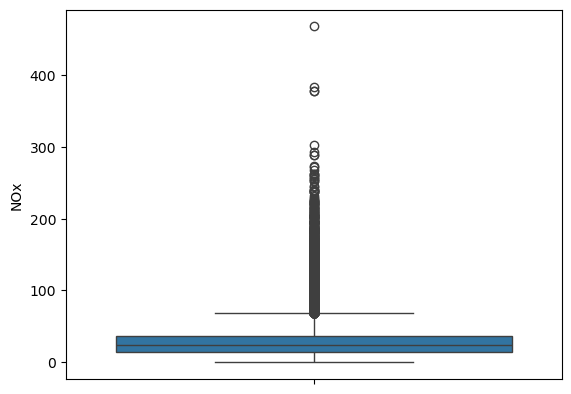

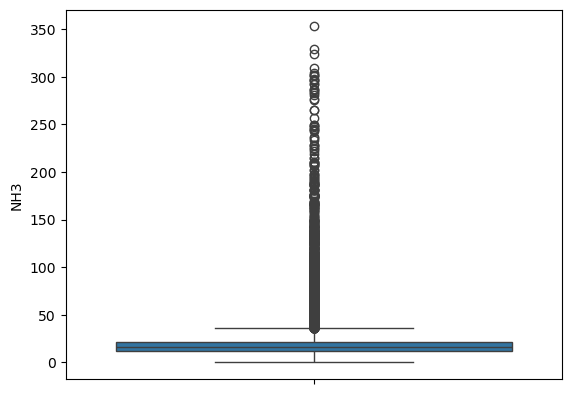

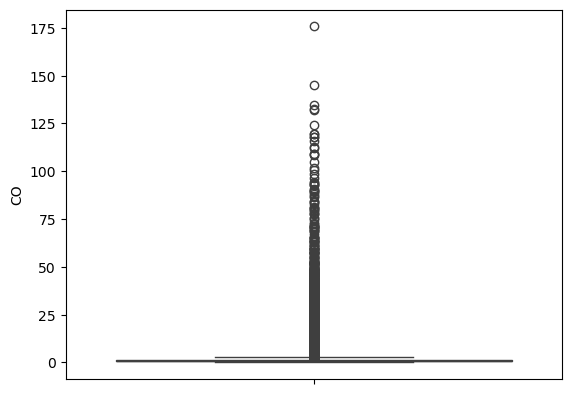

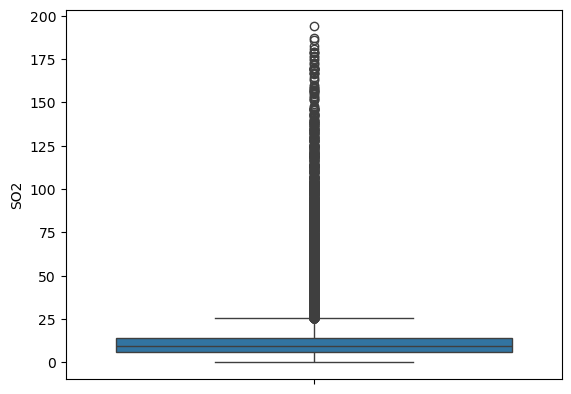

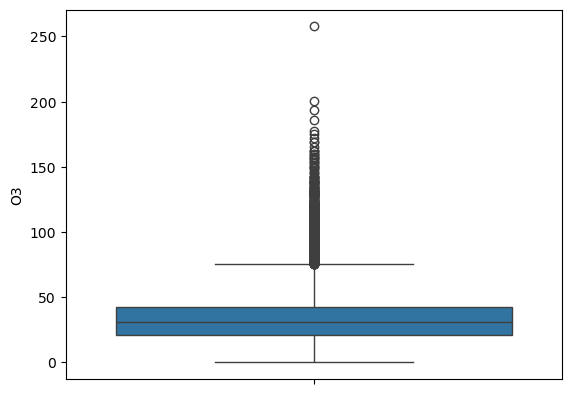

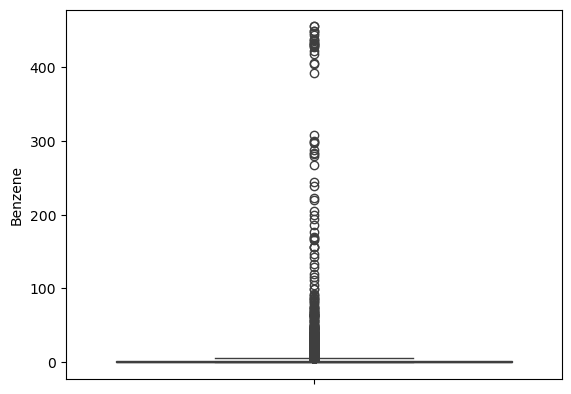

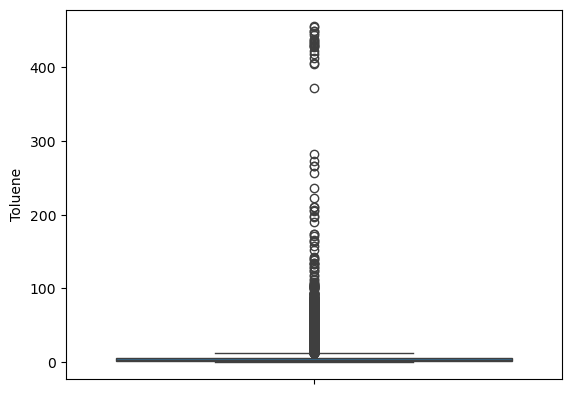

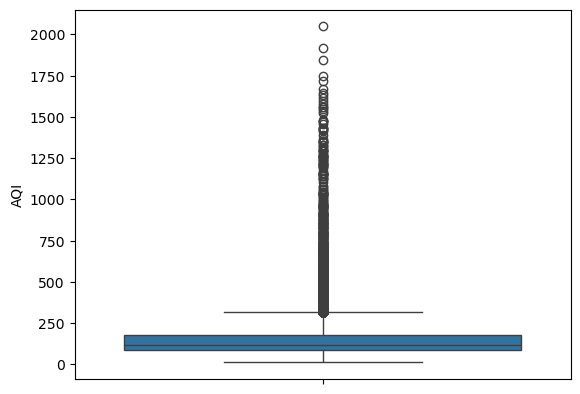

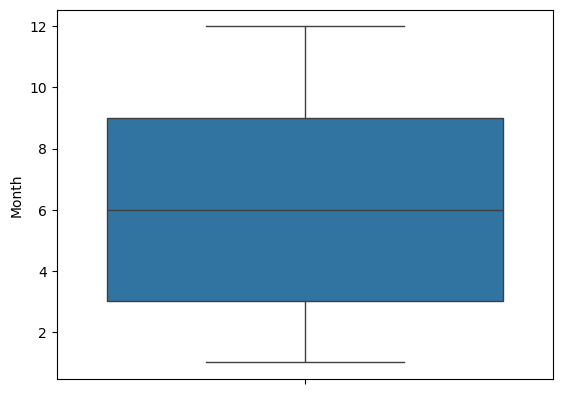

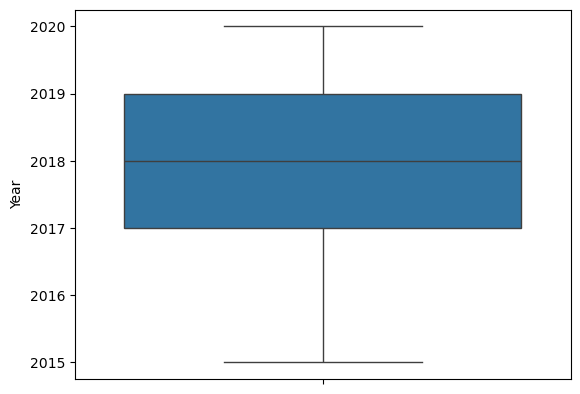

In [33]:
# Plot boxplots to visualize outliers for numerical features
for i in X_train:
    plt.figure()
    sns.boxplot(y=i, data=df)

In [34]:
for i in X_train.select_dtypes(include=np.number):
    q1=X_train[i].quantile(0.25)
    q3=X_train[i].quantile(0.75)
    iqr= q3-q1
    u=q3+1.5*(iqr)
    l=q1-1.5*(iqr)
    X_train[i]=X_train[i].clip(lower=l,upper=u)

In [35]:
data.head(5)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Month,Year
0,Ahmedabad,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,Moderate,1,2015
7834,Chennai,48.57,95.68,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,2.97,118.0,Moderate,1,2015
10229,Delhi,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,472.0,Severe,1,2015
19846,Lucknow,48.57,95.68,2.11,13.46,4.57,15.85,12.15,169.57,25.92,1.35,3.93,118.0,Moderate,1,2015
21855,Mumbai,48.57,95.68,9.89,21.69,27.38,15.85,0.00,9.16,30.84,0.00,0.00,118.0,Moderate,1,2015


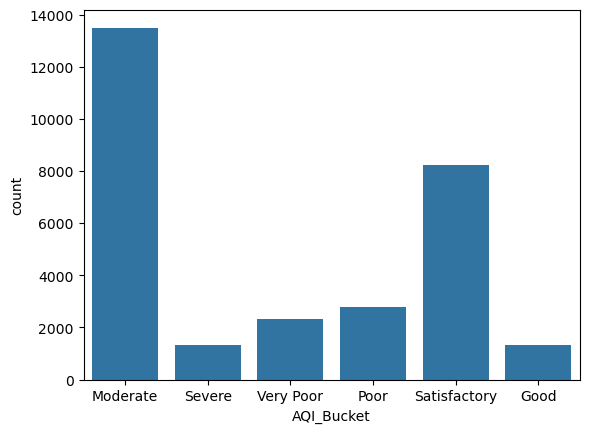

In [36]:
# Visualize the distribution of AQI_Bucket
sns.countplot(x='AQI_Bucket', data=data)
plt.show()

In [39]:
le = LabelEncoder()
X_train['City'] = le.fit_transform(X_train['City'])
X_test['City'] = le.fit_transform(X_test['City'])

In [40]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [42]:
import pandas as pd
pd.Series(y_train_resampled).value_counts()

5    10788
0    10788
1    10788
3    10788
4    10788
2    10788
Name: count, dtype: int64

# Using SMOTE

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(pd.Series(y_train).value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Before SMOTE:
1    10788
3     6586
2     2202
5     1902
4     1087
0     1059
Name: count, dtype: int64

After SMOTE:
5    10788
0    10788
1    10788
3    10788
4    10788
2    10788
Name: count, dtype: int64


# Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Results
Accuracy: 0.9800237006940917
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      1.00      1.00      2722
           2       1.00      1.00      1.00       579
           3       1.00      1.00      1.00      1638
           4       0.83      0.68      0.75       251
           5       0.83      0.91      0.87       435

    accuracy                           0.98      5907
   macro avg       0.94      0.93      0.94      5907
weighted avg       0.98      0.98      0.98      5907

Confusion Matrix:
 [[ 281    0    0    1    0    0]
 [   0 2722    0    0    0    0]
 [   0    0  579    0    0    0]
 [   0    0    0 1638    0    0]
 [   0    1    0    0  171   79]
 [   0    0    1    0   36  398]]


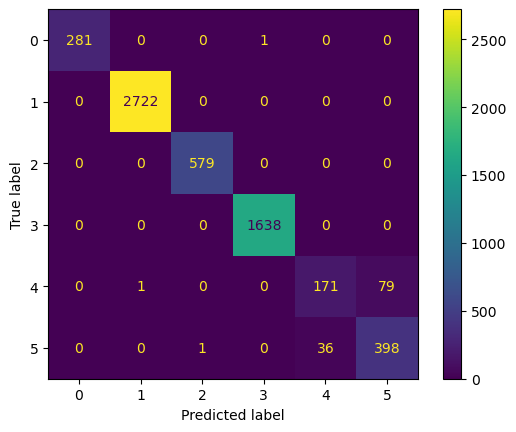

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_) 
disp.plot()
plt.show()

[Text(0.43868745068567744, 0.9821428571428571, 'x[12] <= 100.5\ngini = 0.698\nsamples = 14994\nvalue = [1057, 10613, 2249, 6708, 1114, 1883]'),
 Text(0.31456113031205546, 0.9464285714285714, 'x[12] <= 50.5\ngini = 0.235\nsamples = 4850\nvalue = [1057, 0, 0, 6708, 0, 0]'),
 Text(0.3131386552053698, 0.9107142857142857, 'gini = 0.0\nsamples = 659\nvalue = [1057, 0, 0, 0, 0, 0]'),
 Text(0.3159836054187411, 0.9107142857142857, 'gini = 0.0\nsamples = 4191\nvalue = [0, 0, 0, 6708, 0, 0]'),
 Text(0.5628137710592994, 0.9464285714285714, 'x[2] <= 160.872\ngini = 0.513\nsamples = 10144\nvalue = [0, 10613, 2249, 0, 1114, 1883]'),
 Text(0.3188285556321124, 0.9107142857142857, 'x[5] <= 37.285\ngini = 0.401\nsamples = 8141\nvalue = [0, 9666, 1159, 0, 825, 1045]'),
 Text(0.1460975006667852, 0.875, 'x[1] <= 95.605\ngini = 0.313\nsamples = 6186\nvalue = [0.0, 7929.0, 862.0, 0.0, 243.0, 625.0]'),
 Text(0.05903271692745377, 0.8392857142857143, 'x[1] <= 76.905\ngini = 0.135\nsamples = 5401\nvalue = [0, 779

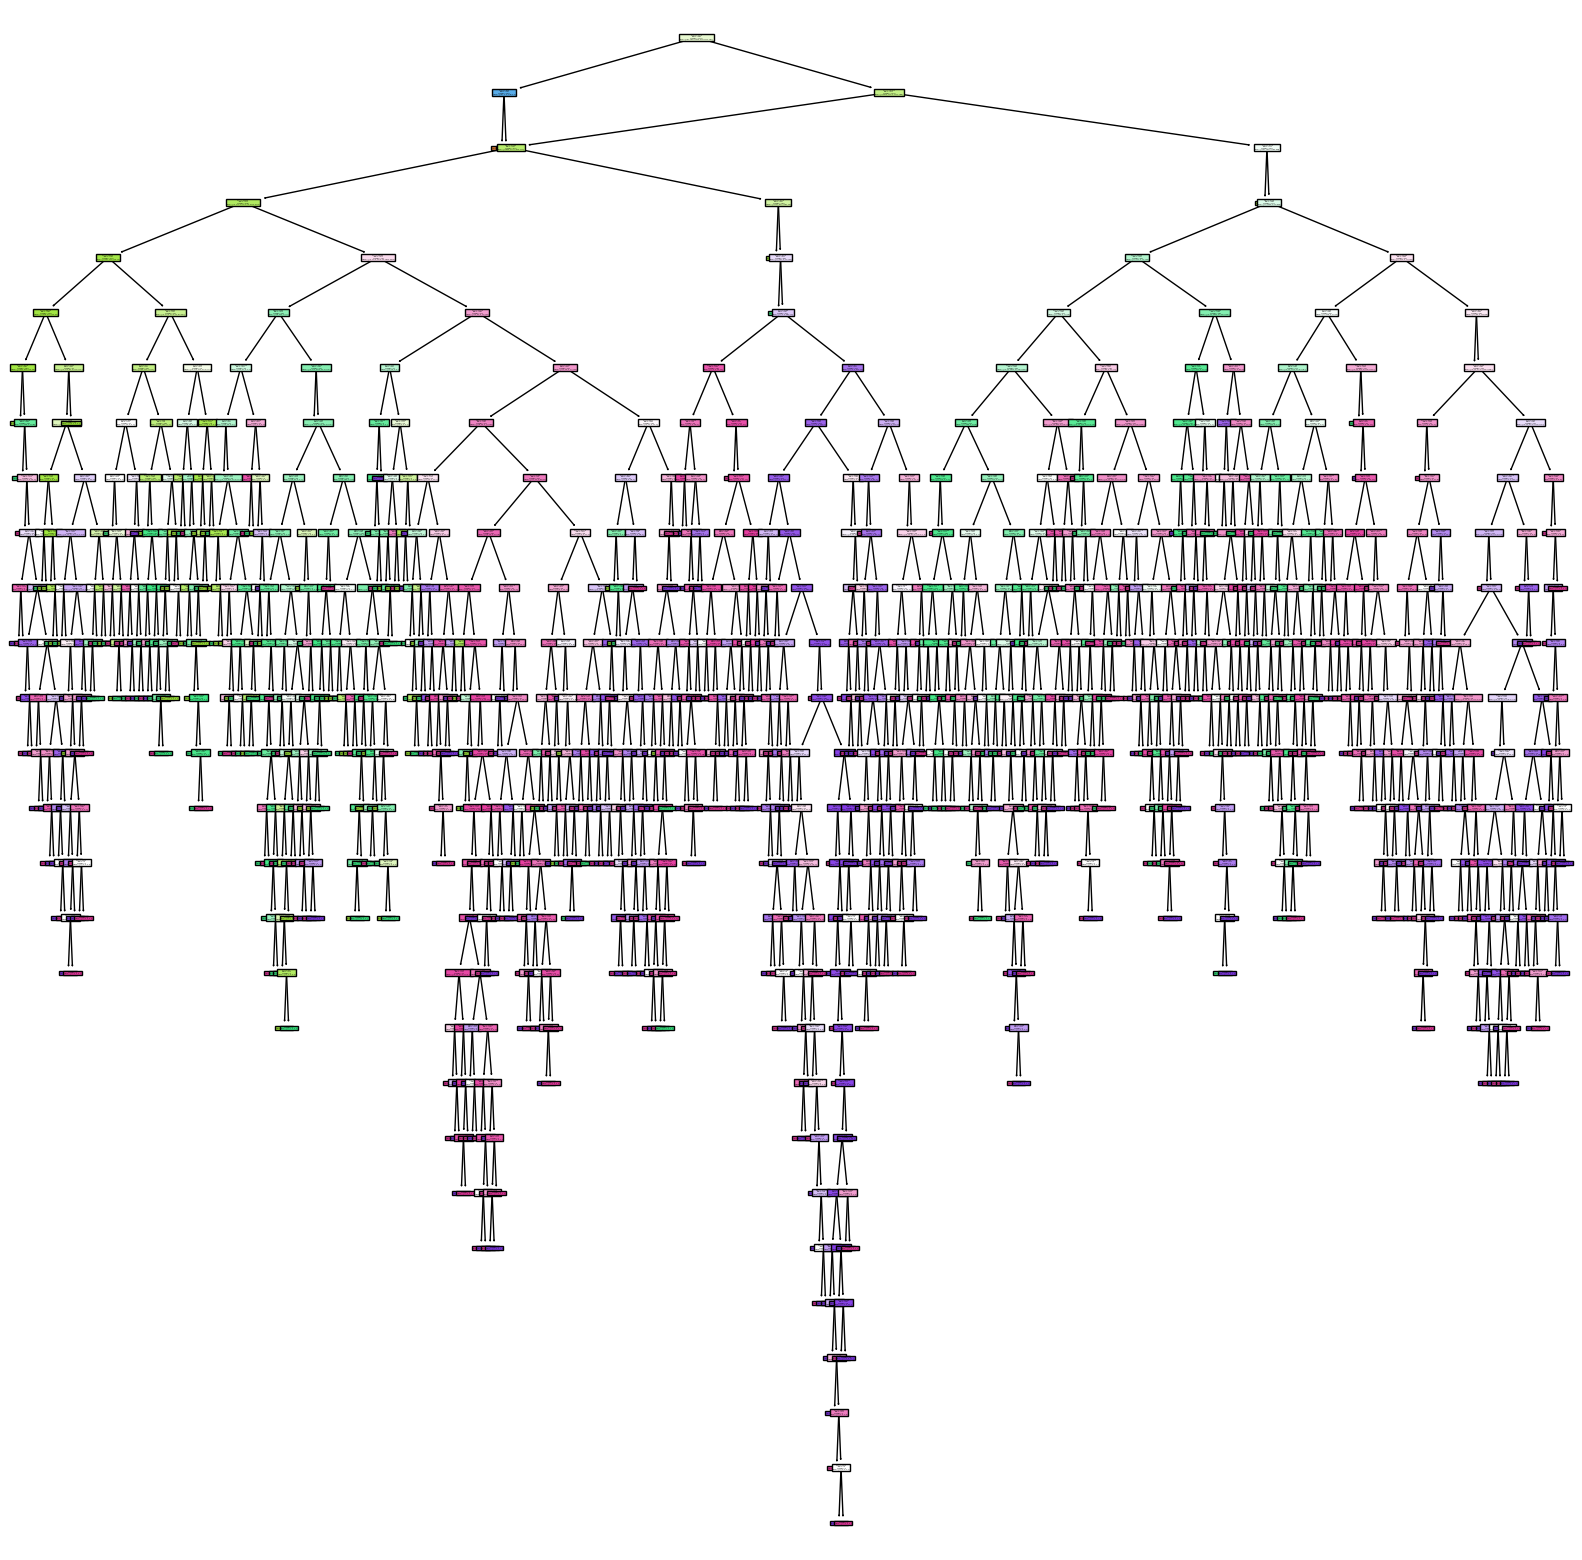

In [49]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(rf_model.estimators_[0], filled=True)

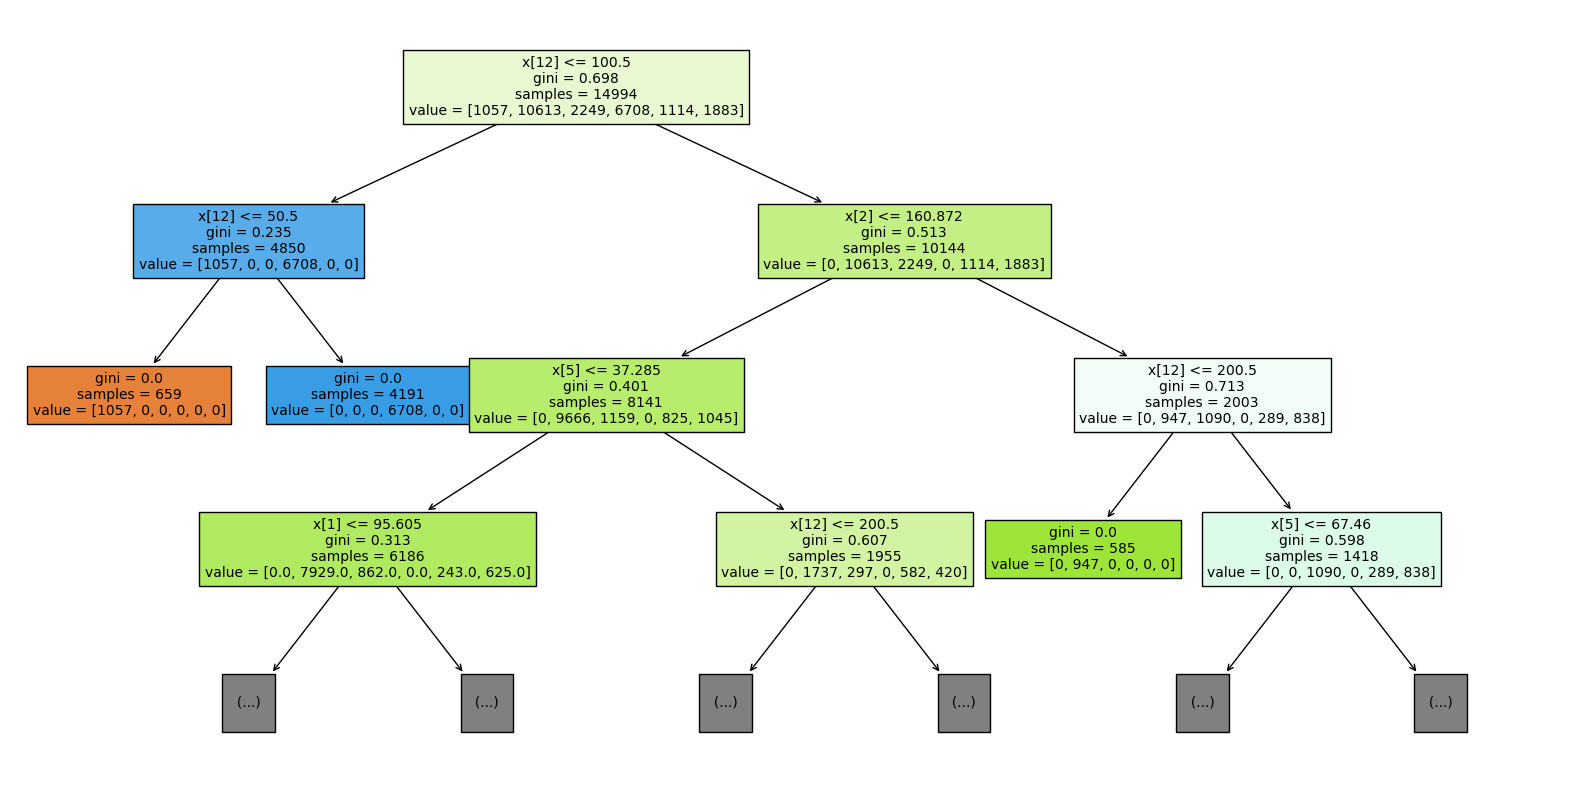

In [57]:
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(rf_model.estimators_[0],filled=True,max_depth=3,fontsize=10)                 
plt.show()

# Support Vector Classifier

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train the model
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc_model.predict(X_test)

# Evaluate
print("Support Vector Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

Support Vector Classifier Results
Accuracy: 0.8594887421703065
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       282
           1       0.93      0.98      0.95      2722
           2       0.99      0.75      0.85       579
           3       0.82      0.90      0.86      1638
           4       0.85      0.29      0.43       251
           5       0.60      0.97      0.74       435

    accuracy                           0.86      5907
   macro avg       0.70      0.65      0.64      5907
weighted avg       0.83      0.86      0.83      5907

Confusion Matrix:
 [[   0    0    0  282    0    0]
 [   0 2670    4   48    0    0]
 [   0   41  434    0    2  102]
 [   0  161    0 1477    0    0]
 [   0    0    0    0   72  179]
 [   0    0    0    0   11  424]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


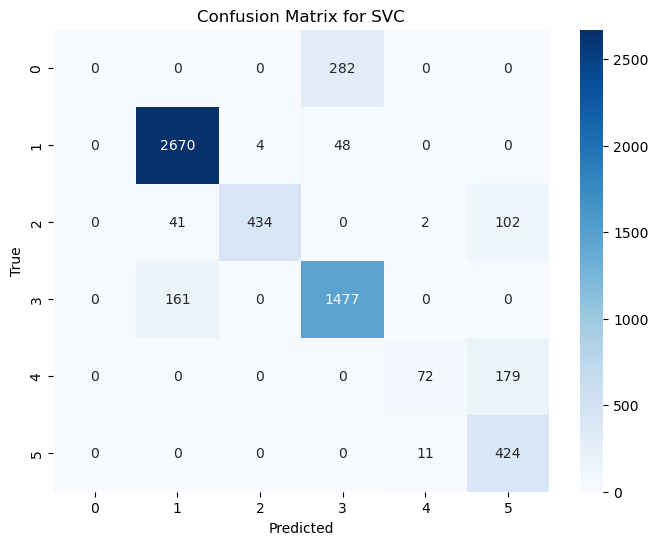

In [59]:
cm = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=svc_model.classes_, 
            yticklabels=svc_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVC')
plt.show()

# K-NearestNeighbour (Classifier)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate
print("K-Nearest Neighbors Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

K-Nearest Neighbors Results
Accuracy: 0.9287286270526494
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       282
           1       0.97      0.97      0.97      2722
           2       0.95      0.91      0.93       579
           3       0.95      0.94      0.95      1638
           4       0.68      0.65      0.66       251
           5       0.75      0.83      0.79       435

    accuracy                           0.93      5907
   macro avg       0.87      0.87      0.87      5907
weighted avg       0.93      0.93      0.93      5907

Confusion Matrix:
 [[ 253    0    0   29    0    0]
 [   0 2637   27   58    0    0]
 [   0   18  529    0    2   30]
 [  20   72    0 1546    0    0]
 [   0    0    0    0  162   89]
 [   0    0    2    0   74  359]]


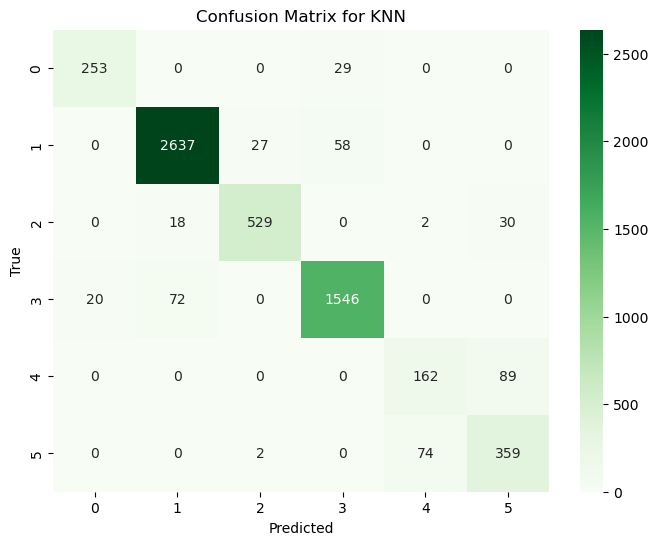

In [61]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=knn_model.classes_,
            yticklabels=knn_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN')
plt.show()

In [62]:
import joblib
joblib.dump(rf_model, 'air_quality_model.pkl')

['air_quality_model.pkl']

In [63]:
X_train

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Month,Year
11000,10,120.43,160.875,34.86625,62.77,55.46,36.28625,0.68,20.09000,35.09,3.170,5.860,314.0,2,2017
10221,9,19.89,30.335,9.89000,50.96,32.74,1.94000,0.61,6.05000,11.72,0.000,0.000,38.0,6,2020
18810,16,32.40,98.090,25.00000,10.88,23.52,9.35000,1.27,23.11000,50.53,1.070,2.970,102.0,5,2020
9739,8,32.68,30.335,9.26000,8.56,16.27,36.28625,0.91,5.55000,31.17,0.600,0.000,95.0,3,2020
2722,2,21.86,56.690,4.74000,19.35,14.24,5.90000,0.45,19.19000,31.87,0.440,13.105,55.0,7,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29200,25,22.25,44.550,26.53000,38.10,41.84,9.55000,0.71,14.35000,3.96,5.775,13.105,82.0,8,2019
28164,25,44.10,93.360,24.07000,45.35,41.13,14.02000,1.03,24.17000,25.85,5.775,13.105,104.0,10,2016
123,0,86.31,95.680,2.69000,10.50,10.90,15.85000,2.69,25.47875,75.62,0.470,0.150,308.0,5,2015
3654,3,48.57,119.970,10.65000,14.79,25.44,11.08000,0.00,6.50000,20.78,5.775,1.670,100.0,10,2018
